# Hash Tables
## MSDS-432 - Kiley - Week 5 Assignment
### Assignment Overview
The mini-programming assignment requires us to implement and test the performance of hash tables leveraging python dictionaries.
The assignment requires us to create a fictional data about persons, store it in various methods and to search for it using different algorithms. 

The output and the time required to search to be captured, reported, and analyzed.

The array is to then be sorted and specific positions captured in a seperate array.

* 10th
* 30th
* 50th
* 70th
* 90th
* 100th

Find these values using linear and binary search, and also use a hash table to search. 

The output and the time required to search to be captured, reported, and analyzed.

The algorithm's performance will be measured using Big O notation. <br>
**Big O Notation** is a way to communicate the number of operations required to perform an algorithm in the worst-case scenario.  The number of operations is represented by n.

Found a wonderful reference site called http://bigocheatsheet.com/.

The sorts that have been selected for testing are:

| Data Structure |Average Search |Worst Search   |
|----------------|---------------|---------------|
| Array          |O(n)           | O(n)          | 
| Hash Table     |O(1)           | O(n)          |


This assignment is git controlled.  The repo was prepared using git bash.

# Setting up working environment, define and test key functions
The packages selected in "In[1]" are all the packages required for the subsequent operations. <br>
They are named based on standard python naming conventions.

In [1]:
# Set up working environment
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import random
from random import randint
import string

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Linear Search** leverages code adapted from stack overflow with slight modifications.
https://stackoverflow.com/questions/43302810/linear-search-python <br>
The code was adapted to follow the same testing pattern used in the Binary Search function.<br>
We will define it as a function so that it may be applied to multiple arrays consistently and quickly.

**Linear Search** (called Simple Search in *Grokking Algorithms*) is an alogorithm that operates in O(n) time.  <br>
A linear search operates by checking requested value against every item in the list serially, begining with the first item in the list.

Note: This alogirthm does not require a pre-sort to be effective as it will search until it finds the value or exhausts the list.  However, to ensure that we can test a worst-case scenario we will sort prior to running the tests.

In [2]:
# Define Linear Search
def linear_search(list, item):
    found = None
    position = 0
    while position < len(list) and not found:
        if list[position] == item:
            found = position
        position = position + 1
    return found

# Check that linear search works
my_list = [1, 3, 5, 7, 9]
print(linear_search(my_list, 3)) # => 1

# 'None' means nil in Python. We use to indicate that the item wasn't found.
print(linear_search(my_list, -1)) # => None

1
None


**Results of the test: The algorithm works as expected. <br>
Linear search returned the correct locations of the requested values.**
<br>
<br>
<br>
**Binary Search** leverages code from *Grokking Algorithms*; the code was sourced from github.
https://github.com/egonSchiele/grokking_algorithms/blob/master/01_introduction_to_algorithms/python/01_binary_search.py
We will define it as a function so that it may be applied to multiple arrays consistently and quickly.

**Binary search** is an alogrithm that operates in O(log n) time. <br>
A binary search requires that the values of the list be sorted prior to running the algorithm.
The algorithm recursively finds the mid-point of the sorted dataset and determines if the value is to the left of, or right of the mid-point (less than or greater than).  
The algorithm effectively eliminates the half of the data that is no longer needed at each iteration until it finds the requested value. 

Because it can eliminate substanial portions of the data at each step, the data is significantly more efficent and scales much better than Linear Search.

In [3]:
# Define binary search
def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
  low = 0
  high = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while low <= high:
    # ... check the middle element
    mid = (low + high) // 2
    guess = list[mid]
    # Found the item.
    if guess == item:
      return mid
    # The guess was too high.
    if guess > item:
      high = mid - 1
    # The guess was too low.
    else:
      low = mid + 1

  # Item doesn't exist
  return None

# Check that binary serach works
my_list = [1, 3, 5, 7, 9]
print(binary_search(my_list, 3)) # => 1

# 'None' means nil in Python. We use to indicate that the item wasn't found.
print(binary_search(my_list, -1)) # => None

1
None


**Results of the test: The algorithms works as expected.** <br>

# Generate And Test Random Data 
The random seed generator provided in the project requirements returned the value 922.<br>
Leveraging a seed as such creates reproducable work.<br>
That seed has been set below.<br>

The assignment has asked that the algorithms be tested a fictional name.  The names are to be generated with random characters.  Names are to be 10 characters long with the name generated with random characters. 

Later tests require that the data be sorted.
We will perform that step here while we are generating the data.

Merge sort has been selected for its general efficency.
Merge sort operates in O(n log(n)) time at both its average and worst case senarios.

To ensure that the same tests are performed on each data set, a function will be generated to capture the requested tests. 

In [4]:
# Set Random Seeds
SEED = np.random.seed(922)
random.seed(922)

# Generate random names
def gen_name(array_len):
    temp1=[]
    i=0
    while i < array_len:
        temp2 = ''.join(random.choice(string.ascii_lowercase) for n in range(10))
        temp1.append(temp2)
        i+=1
    return temp1

# Generate first and last names
a_firstname = gen_name(100)
# Sorted version for later use
sort_a_firstname = np.sort(a_firstname, kind='mergesort')


# Generage an enumarted dictionary of generated names; the key is the name; number is value 
name_dict = {a_firstname[i] : i  for i in range (0, len(a_firstname))}
# Sorted version for later use
sort_dict = {sort_a_firstname[i] : i  for i in range (0, len(sort_a_firstname))}


# Print a sample from each set to ensure data is consistant with expectations
print('First three firstnames are:', a_firstname[:3])
print('First three sorted firstnames are:', sort_a_firstname[:3])
print('Confirmed, eveything appears as expected')

First three firstnames are: ['bqpggxcwhj', 'kdsejkhxkn', 'enhxuewxyi']
First three sorted firstnames are: ['aivcduclkj' 'bjmcivratn' 'bqpggxcwhj']
Confirmed, eveything appears as expected


## Draw names to search for
Generate a random index in within the array bounds.
Use the index to retrieve five random names to then search the dataset for using linear search.

Also retrive from selected postions.

Assignment requirements also request the names at the nth position [10th, 30th, 50th, 70th, 90th and 100th positions].
Because index begins at 0 it is n-1.


In [5]:
random.seed(922)

# Draw random names from an array to search for later
find_names = [randint(0,100),
              randint(0,100),
              randint(0,100),
              randint(0,100),
              randint(0,100)
             ]

name_array = [a_firstname[find_names[0]],
              a_firstname[find_names[1]],
              a_firstname[find_names[2]],
              a_firstname[find_names[3]],
              a_firstname[find_names[4]]
             ]

print('Randomly drawn names from the array are:\n',
      name_array)

# Draw names from positions in the sorted array
name_array2 = [sort_a_firstname[9],
               sort_a_firstname[29],
               sort_a_firstname[49],
               sort_a_firstname[69],
               sort_a_firstname[89],
               sort_a_firstname[99]
              ]

print('The names at the positions defined in the requirements are:\n',
      name_array2)

Randomly drawn names from the array are:
 ['uaxazrvizo', 'lzxlfurwuh', 'wvaegzrwqs', 'mnyppwjhxr', 'eicyjnzmol']
The names at the positions defined in the requirements are:
 ['dtzrrmebpl', 'itdqrogzue', 'nhcmazefiy', 'sruxuhxqqa', 'wzfpvcryki', 'zzzjzhedkh']


## Create function to run the trial
Here we define a function to perform the test the test for binary, linear, and hash table searches.

This ensures that we get consistent output and can quickly iterate through the trials.

In [6]:
# Define function to sort & store the data associated with the trials
def run_trial(sel_array, find_array):
    # Create an empty list to store results
    fun_results=list([])
    fun_names=list([])
    fun_timer=list([])
    fun_method=list([])
      
    for i in find_array:
        start = time.clock() # Timestamp start
        fun_results.append(linear_search(sel_array, i)) # Runs the algorithm
        fun_names.append(i) # Returns the value that was found
        end = time.clock() # Timestamp finish
        fun_method.append('linear_search')
        fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds 

    for i in find_array:
        start = time.clock() # Timestamp start
        # NOTE BINARY SEARCH WILL NOT WORK W/O BEING SORTED FIRST
        fun_results.append(binary_search(sel_array, i)) # Runs the algorithm
        fun_names.append(i) # Returns the value that was found
        end = time.clock() # Timestamp finish
        fun_method.append('binary_search')
        fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds 
    
    for i in find_array:
        start = time.clock() # Timestamp start
        fun_results.append(name_dict.get(i)) # Runs the algorithm
        fun_names.append(i) # Returns the value that was found
        end = time.clock() # Timestamp finish
        fun_method.append('hash_table')
        fun_timer.append(round((end - start)*1000,6)) # Convert to milliseconds 
    
    return [fun_method, fun_names, fun_timer, fun_results] # Returns what was run, the time it was run, and the output

# Run Trials 
There are four permutations of this problem that have been run and stored.

In [7]:
# Run on unsorted array, with the randomized five names to find
trial1 = run_trial(a_firstname,name_array)

# Run on sorted array, with the selected index location for six names to find
trial2 = run_trial(sort_a_firstname,name_array2)

# Run on unsorted  array, with selected index location for six names to find
trial3 = run_trial(a_firstname,name_array2)

# Run on sorted array, with the randomized five names to find
trial4 = run_trial(sort_a_firstname,name_array)


# Create Pandas Data Frame

Most of the work has been completed, this next step passes the generated data to the selected functions defined previously.  The arrays are then summarized into a pandas data frame for further analysis. 

In [8]:
# Store the performance outputs for analysis

# Trial 1 - unsorted array, with the randomized five names to find
df = pd.DataFrame({'method': trial1[0],
                   'values_searched': trial1[1],
                   'timer': trial1[2],
                   'results': trial1[3], 
                   'presorted': 'N', 
                   'search_sel_method':'random',
                   'items_to_find':5
                    })

# Trial 2 - sorted array, with the selected index location for six names to find
df1 = pd.DataFrame({'method': trial2[0],
                   'values_searched': trial2[1],
                   'timer': trial2[2],
                   'results': trial2[3], 
                   'presorted': 'Y',
                   'search_sel_method':'index_location',
                   'items_to_find':6
                    })

# Trial 3 - unsorted  array, with selected index location for six names to find
df2 = pd.DataFrame({'method': trial3[0],
                   'values_searched': trial3[1],
                   'timer': trial3[2],
                   'results': trial3[3], 
                   'presorted': 'N',
                   'search_sel_method':'index_location',
                   'items_to_find':6
                    })

# Trial 4 - sorted array, with the randomized five names to find
df3 = pd.DataFrame({'method': trial4[0],
                   'values_searched': trial4[1],
                   'timer': trial4[2],
                   'results': trial4[3], 
                   'presorted': 'Y',
                   'search_sel_method':'random',
                   'items_to_find':5
                    })


# Combine metrics into master data frame
df_master = pd.concat([df, df1, df2, df3])
df_master.head()

,method,values_searched,timer,results,presorted,search_sel_method,items_to_find
0,linear_search,uaxazrvizo,0.003879,6.0,N,random,5
1,linear_search,lzxlfurwuh,0.007758,64.0,N,random,5
2,linear_search,wvaegzrwqs,0.006788,62.0,N,random,5
3,linear_search,mnyppwjhxr,0.002909,25.0,N,random,5
4,linear_search,eicyjnzmol,0.003394,26.0,N,random,5


In [9]:
# Create summary pivot table, try to compare like-to-like results
pd.pivot_table(df_master, index=['items_to_find', 'search_sel_method', 'method'], columns='presorted', values='timer', aggfunc=np.sum)

presorted                                             N         Y
items_to_find search_sel_method method                           
5             random            binary_search  0.007274  0.013575
                                hash_table     0.002425  0.001940
                                linear_search  0.024728  0.093091
6             index_location    binary_search  0.006790  0.017455
                                hash_table     0.000970  0.002910
                                linear_search  0.042667  0.124123

# Visualize Results

In [10]:
# Create plot of time versus the position in the array that was identified
# Create a function to produce the same visuzal for several trials

def vizualize(sort, items, shape):
    plt.plot(df_master[(df_master['method'] == 'hash_table') 
                & (df_master['presorted']==sort)
                & (df_master['items_to_find']==items)]['results'],
             df_master[(df_master['method'] == 'hash_table')
                & (df_master['presorted']==sort)
                & (df_master['items_to_find']==items)]['timer'],
             'r'+shape, label='hash_table - '+ sort+' sort -'+ str(items)+' items')

    plt.plot(df_master[(df_master['method'] == 'binary_search') 
                & (df_master['presorted']==sort)
                & (df_master['items_to_find']==items)]['results'],
             df_master[(df_master['method'] == 'binary_search')
                & (df_master['presorted']==sort)
                & (df_master['items_to_find']==items)]['timer'],
             'b'+shape, label='binary_search - '+ sort+' sort -'+ str(items)+' items')
    
    plt.plot(df_master[(df_master['method'] == 'linear_search') 
                & (df_master['presorted']==sort)
                & (df_master['items_to_find']==items)]['results'],
             df_master[(df_master['method'] == 'linear_search')
                & (df_master['presorted']==sort)
                & (df_master['items_to_find']==items)]['timer'],
             'g'+shape, label='linear_search - '+ sort+' sort -'+ str(items)+' items')

    # Label Graph
    plt.ylabel('Time in Milliseconds')
    plt.xlabel('Position in the List')
    plt.title('Linear, Binary, Hash Search Times: No Sort - 5 Items')

    #plt.axis([0, 100, -1, 1])
    #Create Legend and define axes
    plt.legend()
    plt.show()

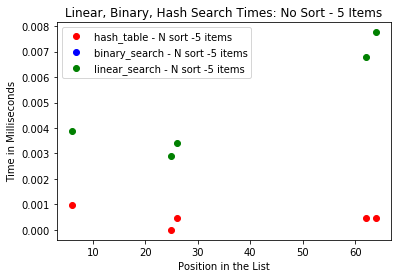

binary search fails because it is not presorted


In [11]:
vizualize('N',5,'o')
print('binary search fails because it is not presorted')

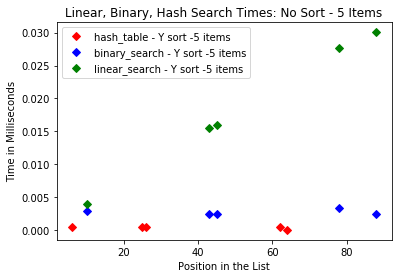

In [12]:
vizualize('Y',5,'D')

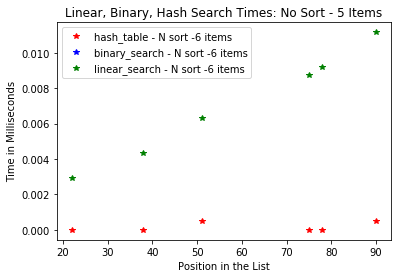

binary search fails because it is not presorted


In [13]:
vizualize('N',6,'*')
print('binary search fails because it is not presorted')

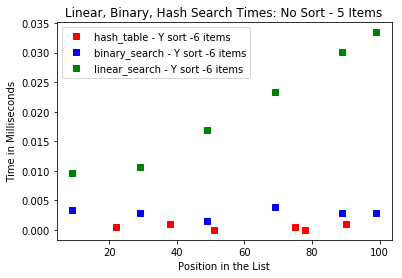

In [14]:
vizualize('Y',6,'s')

The graphics above are what was created for all tests performed as part of this assigment.  
The algorithm operates extremely quickly and hardly takes any time to run.

**The quickest search method is certainly leveraging Hash/Dictionaries which is expected based on bigO notation.**

Data engineers are required to consider how to ensure that an operation can perform effectively at scale.  This exercise helps to reinforce the value of measuring and testing algorithms as they scale.